http://www.vision.caltech.edu/Image_Datasets/Caltech101/

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

#plt.gray()

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!mkdir datasets

In [ ]:
!cp /gdrive/MyDrive/101_ObjectCategories.tar.gz ./datasets/101_ObjectCategories.tar.gz

In [ ]:
!tar -zxvf ./datasets/101_ObjectCategories.tar.gz

In [ ]:
data_dir = './101_ObjectCategories'
height = 200
width = 300

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(height, width),
    shuffle=True,
    seed=1,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
).map(lambda x,y: (x / 255.0,y))

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(height, width),
    shuffle=False,
    seed=1,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
).map(lambda x,y: (x / 255.0,y))

Found 9144 files belonging to 102 classes.
Using 7316 files for training.
Found 9144 files belonging to 102 classes.
Using 1828 files for validation.


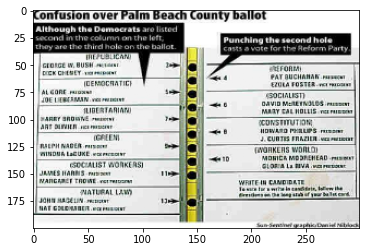

tf.Tensor(
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.], shape=(102,), dtype=float32)
tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
for x,y in train_dataset.take(1):
  plt.imshow(x[0])
  plt.show()

  print(y[0])
  print(tf.argmax(y[0]))

In [ ]:
def plot_history(h):
  plt.plot(h.history['accuracy'])
  plt.plot(h.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  plt.plot(h.history['loss'])
  plt.plot(h.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [ ]:
input_im = tf.keras.Input(shape=(height, width, 3))
x = tf.keras.layers.Flatten()(input_im)
x = tf.keras.layers.Dense(400, activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
#x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(100, activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dense(102, activation='softmax', kernel_initializer='he_uniform')(x)

good_model_adam = tf.keras.Model(input_im, x)

good_model_adam.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 300, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 180000)            0         
                                                                 
 dense (Dense)               (None, 400)               72000400  
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 batch_normalization (BatchN  (None, 400)              1600      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 400)               0         
                                                             

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

good_model_adam.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics='accuracy')

h_good_adam = good_model_adam.fit(train_dataset, validation_data = val_dataset, epochs = 20)

Epoch 1/20
458/458 [==============================] - 16s 30ms/step - loss: 3.7830 - accuracy: 0.2251 - val_loss: 4.5063 - val_accuracy: 0.0591
Epoch 2/20
458/458 [==============================] - 14s 30ms/step - loss: 3.2544 - accuracy: 0.3085 - val_loss: 3.8876 - val_accuracy: 0.1417
Epoch 3/20
458/458 [==============================] - 13s 29ms/step - loss: 3.0175 - accuracy: 0.3402 - val_loss: 3.6080 - val_accuracy: 0.2183
Epoch 4/20
458/458 [==============================] - 14s 29ms/step - loss: 2.8245 - accuracy: 0.3669 - val_loss: 3.3896 - val_accuracy: 0.2276
Epoch 5/20
458/458 [==============================] - 13s 29ms/step - loss: 2.7003 - accuracy: 0.3878 - val_loss: 3.2947 - val_accuracy: 0.2495
Epoch 6/20
458/458 [==============================] - 14s 29ms/step - loss: 2.5931 - accuracy: 0.4051 - val_loss: 3.1283 - val_accuracy: 0.2823
Epoch 7/20
458/458 [==============================] - 14s 29ms/step - loss: 2.4815 - accuracy: 0.4262 - val_loss: 2.9372 - val_accuracy:

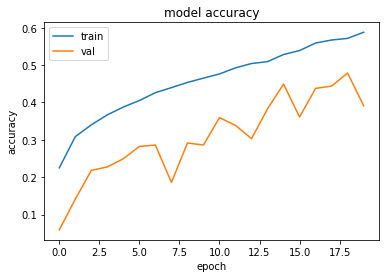

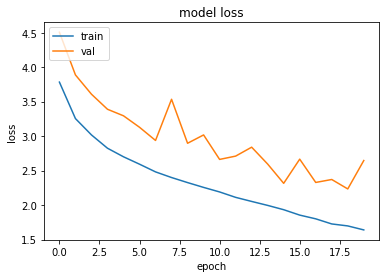

In [ ]:
plot_history(h_good_adam)

https://keras.io/api/layers/convolution_layers/convolution2d/

In [ ]:
input_im = tf.keras.Input(shape=(height, width, 3))
x = tf.keras.layers.Conv2D(32, 5, strides=2, padding='same', activation=None, kernel_initializer='he_uniform')(input_im)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
#x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Conv2D(64, 3, strides=2, padding='same', activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(102, activation='softmax', kernel_initializer='he_uniform')(x)

cnn_1_model_adam = tf.keras.Model(input_im, x)

cnn_1_model_adam.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 300, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 150, 32)      2432      
                                                                 
 dropout_1 (Dropout)         (None, 100, 150, 32)      0         
                                                                 
 batch_normalization_2 (Batc  (None, 100, 150, 32)     128       
 hNormalization)                                                 
                                                                 
 re_lu_2 (ReLU)              (None, 100, 150, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 75, 64)        18496     
                                                           

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

cnn_1_model_adam.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics='accuracy')

h_cnn_1_adam = cnn_1_model_adam.fit(train_dataset, validation_data = val_dataset, epochs = 20)

Epoch 1/20
458/458 [==============================] - 22s 31ms/step - loss: 35.1776 - accuracy: 0.3203 - val_loss: 3.4924 - val_accuracy: 0.5678
Epoch 2/20
458/458 [==============================] - 14s 31ms/step - loss: 0.4127 - accuracy: 0.9058 - val_loss: 1.4180 - val_accuracy: 0.7910
Epoch 3/20
458/458 [==============================] - 14s 30ms/step - loss: 0.0697 - accuracy: 0.9854 - val_loss: 1.0186 - val_accuracy: 0.8676
Epoch 4/20
458/458 [==============================] - 14s 30ms/step - loss: 0.0661 - accuracy: 0.9877 - val_loss: 1.1517 - val_accuracy: 0.8534
Epoch 5/20
458/458 [==============================] - 14s 31ms/step - loss: 0.0537 - accuracy: 0.9911 - val_loss: 1.0091 - val_accuracy: 0.8769
Epoch 6/20
458/458 [==============================] - 14s 31ms/step - loss: 0.1707 - accuracy: 0.9738 - val_loss: 1.4901 - val_accuracy: 0.8167
Epoch 7/20
458/458 [==============================] - 14s 31ms/step - loss: 0.1594 - accuracy: 0.9706 - val_loss: 1.3034 - val_accuracy

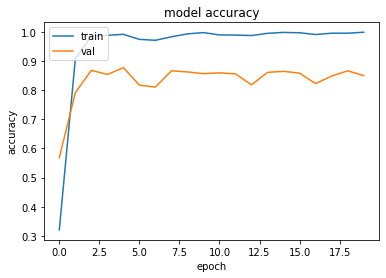

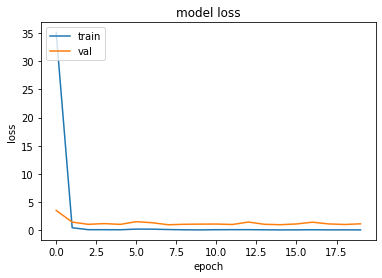

In [ ]:
plot_history(h_cnn_1_adam)

https://keras.io/api/layers/pooling_layers/

In [ ]:
input_im = tf.keras.Input(shape=(height, width, 3))

x = tf.keras.layers.Conv2D(32, 5, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(input_im)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(64, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(128, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(102, activation='softmax', kernel_initializer='he_uniform')(x)

cnn_old_model_adam = tf.keras.Model(input_im, x)

cnn_old_model_adam.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 200, 300, 3)]     0         
                                                                 
 conv2d_19 (Conv2D)          (None, 200, 300, 32)      2432      
                                                                 
 batch_normalization_19 (Bat  (None, 200, 300, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 100, 150, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 100, 150, 64)      18496     
                                                                 
 batch_normalization_20 (Bat  (None, 100, 150, 64)     256 

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

cnn_old_model_adam.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics='accuracy')

h_cnn_old_adam = cnn_old_model_adam.fit(train_dataset, validation_data = val_dataset, epochs = 5)

Epoch 1/5
458/458 [==============================] - 17s 35ms/step - loss: 3.6495 - accuracy: 0.2605 - val_loss: 5.6390 - val_accuracy: 0.0235
Epoch 2/5
458/458 [==============================] - 16s 34ms/step - loss: 3.1599 - accuracy: 0.3272 - val_loss: 5.5676 - val_accuracy: 0.0656
Epoch 3/5
458/458 [==============================] - 16s 34ms/step - loss: 2.9045 - accuracy: 0.3644 - val_loss: 7.2503 - val_accuracy: 0.0394
Epoch 4/5
458/458 [==============================] - 16s 36ms/step - loss: 2.7197 - accuracy: 0.3943 - val_loss: 3.9647 - val_accuracy: 0.1373
Epoch 5/5
458/458 [==============================] - 16s 35ms/step - loss: 2.5783 - accuracy: 0.4169 - val_loss: 3.7762 - val_accuracy: 0.1745


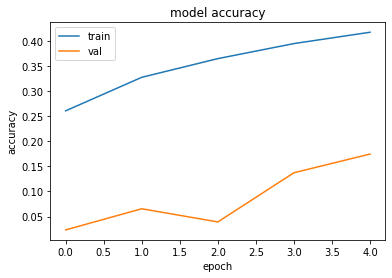

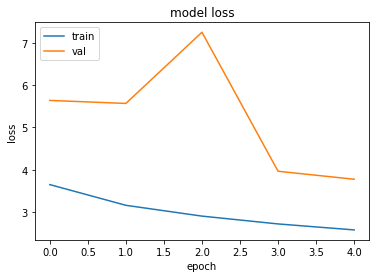

In [ ]:
plot_history(h_cnn_old_adam)

In [ ]:
input_im = tf.keras.Input(shape=(height, width, 3))

x = tf.keras.layers.Conv2D(32, 5, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(input_im)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(64, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(128, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(102, activation='softmax', kernel_initializer='he_uniform')(x)

cnn_old_model_2_adam = tf.keras.Model(input_im, x)

cnn_old_model_2_adam.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 200, 300, 3)]     0         
                                                                 
 conv2d_25 (Conv2D)          (None, 200, 300, 32)      2432      
                                                                 
 batch_normalization_25 (Bat  (None, 200, 300, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 100, 150, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 100, 150, 64)      18496     
                                                                 
 batch_normalization_26 (Bat  (None, 100, 150, 64)     256 

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.00001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

cnn_old_model_2_adam.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics='accuracy')

h_cnn_old_2_adam = cnn_old_model_2_adam.fit(train_dataset, validation_data = val_dataset, epochs = 5)

Epoch 1/5
458/458 [==============================] - 17s 35ms/step - loss: 4.6329 - accuracy: 0.0346 - val_loss: 4.7305 - val_accuracy: 0.0126
Epoch 2/5
458/458 [==============================] - 16s 35ms/step - loss: 4.3648 - accuracy: 0.1296 - val_loss: 4.6595 - val_accuracy: 0.0263
Epoch 3/5
458/458 [==============================] - 16s 35ms/step - loss: 4.2122 - accuracy: 0.1852 - val_loss: 4.6084 - val_accuracy: 0.0328
Epoch 4/5
458/458 [==============================] - 16s 35ms/step - loss: 4.1174 - accuracy: 0.2020 - val_loss: 4.5632 - val_accuracy: 0.0361
Epoch 5/5
458/458 [==============================] - 16s 35ms/step - loss: 4.0464 - accuracy: 0.2156 - val_loss: 4.5339 - val_accuracy: 0.0388


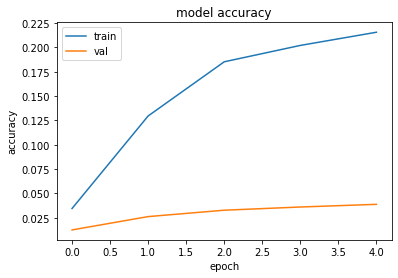

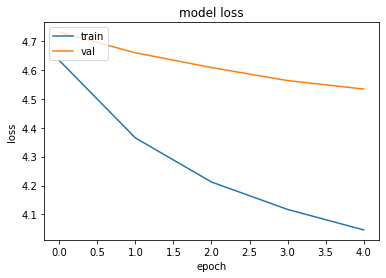

In [ ]:
plot_history(h_cnn_old_2_adam)

In [ ]:
input_im = tf.keras.Input(shape=(height, width, 3))

x = tf.keras.layers.Conv2D(32, 5, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(input_im)
#x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(64, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(x)
#x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(128, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(x)
#x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(102, activation='softmax', kernel_initializer='he_uniform')(x)

cnn_old_model_3_adam = tf.keras.Model(input_im, x)

cnn_old_model_3_adam.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 200, 300, 3)]     0         
                                                                 
 conv2d_28 (Conv2D)          (None, 200, 300, 32)      2432      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 100, 150, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 100, 150, 64)      18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 50, 75, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 50, 75, 128)       738

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.00001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

cnn_old_model_3_adam.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics='accuracy')

h_cnn_old_3_adam = cnn_old_model_3_adam.fit(train_dataset, validation_data = val_dataset, epochs = 5)

Epoch 1/5
458/458 [==============================] - 16s 33ms/step - loss: 4.6931 - accuracy: 0.0409 - val_loss: 4.9984 - val_accuracy: 0.0000e+00
Epoch 2/5
458/458 [==============================] - 15s 32ms/step - loss: 4.3363 - accuracy: 0.0897 - val_loss: 4.8810 - val_accuracy: 0.0000e+00
Epoch 3/5
458/458 [==============================] - 15s 32ms/step - loss: 4.2599 - accuracy: 0.0898 - val_loss: 4.8110 - val_accuracy: 0.0000e+00
Epoch 4/5
458/458 [==============================] - 15s 32ms/step - loss: 4.2232 - accuracy: 0.1003 - val_loss: 4.7836 - val_accuracy: 0.0000e+00
Epoch 5/5
458/458 [==============================] - 15s 32ms/step - loss: 4.1959 - accuracy: 0.1126 - val_loss: 4.7762 - val_accuracy: 0.0000e+00


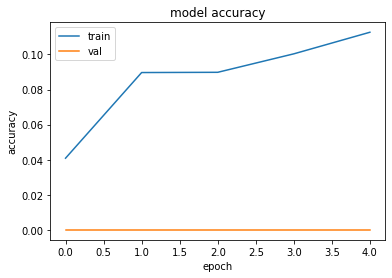

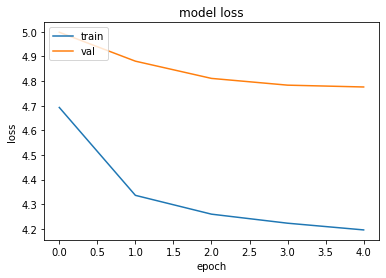

In [ ]:
plot_history(h_cnn_old_3_adam)

In [ ]:
input_im = tf.keras.Input(shape=(height, width, 3))

x = tf.keras.layers.Conv2D(32, 5, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(input_im)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(64, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(128, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(102, activation='softmax', kernel_initializer='he_uniform')(x)

cnn_old_model_4_adam = tf.keras.Model(input_im, x)

cnn_old_model_4_adam.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 200, 300, 3)]     0         
                                                                 
 conv2d_31 (Conv2D)          (None, 200, 300, 32)      2432      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 100, 150, 32)     0         
 g2D)                                                            
                                                                 
 batch_normalization_28 (Bat  (None, 100, 150, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_32 (Conv2D)          (None, 100, 150, 64)      18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 50, 75, 64)       0  

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.00001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

cnn_old_model_4_adam.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics='accuracy')

h_cnn_old_4_adam = cnn_old_model_4_adam.fit(train_dataset, validation_data = val_dataset, epochs = 5)

Epoch 1/5
458/458 [==============================] - 16s 33ms/step - loss: 4.5552 - accuracy: 0.0637 - val_loss: 4.6457 - val_accuracy: 0.0219
Epoch 2/5
458/458 [==============================] - 15s 32ms/step - loss: 4.3042 - accuracy: 0.1747 - val_loss: 4.6681 - val_accuracy: 0.0120
Epoch 3/5
458/458 [==============================] - 15s 33ms/step - loss: 4.1774 - accuracy: 0.1974 - val_loss: 4.6417 - val_accuracy: 0.0088
Epoch 4/5
458/458 [==============================] - 15s 33ms/step - loss: 4.1014 - accuracy: 0.2072 - val_loss: 4.6071 - val_accuracy: 0.0175
Epoch 5/5
458/458 [==============================] - 15s 32ms/step - loss: 4.0405 - accuracy: 0.2153 - val_loss: 4.5749 - val_accuracy: 0.0208


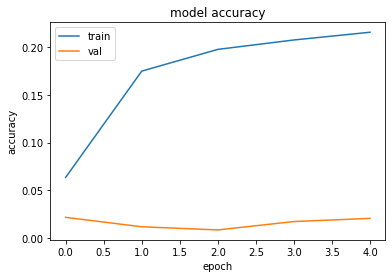

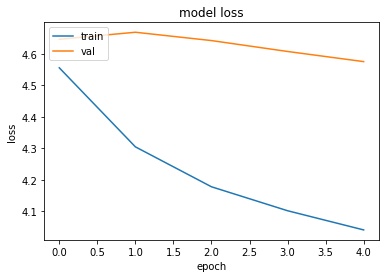

In [ ]:
plot_history(h_cnn_old_4_adam)

In [ ]:
input_im = tf.keras.Input(shape=(height, width, 3))

x = tf.keras.layers.Conv2D(32, 5, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(input_im)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(64, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(128, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(102, activation='softmax', kernel_initializer='he_uniform')(x)

cnn_old_model_5_adam = tf.keras.Model(input_im, x)

cnn_old_model_5_adam.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 200, 300, 3)]     0         
                                                                 
 conv2d_34 (Conv2D)          (None, 200, 300, 32)      2432      
                                                                 
 batch_normalization_31 (Bat  (None, 200, 300, 32)     128       
 chNormalization)                                                
                                                                 
 average_pooling2d (AverageP  (None, 100, 150, 32)     0         
 ooling2D)                                                       
                                                                 
 conv2d_35 (Conv2D)          (None, 100, 150, 64)      18496     
                                                                 
 batch_normalization_32 (Bat  (None, 100, 150, 64)     256

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

cnn_old_model_5_adam.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics='accuracy')

h_cnn_old_5_adam = cnn_old_model_5_adam.fit(train_dataset, validation_data = val_dataset, epochs = 5)

Epoch 1/5
458/458 [==============================] - 56s 35ms/step - loss: 3.7320 - accuracy: 0.2430 - val_loss: 4.5113 - val_accuracy: 0.0470
Epoch 2/5
458/458 [==============================] - 16s 35ms/step - loss: 3.2784 - accuracy: 0.3018 - val_loss: 4.3378 - val_accuracy: 0.0930
Epoch 3/5
458/458 [==============================] - 16s 35ms/step - loss: 3.0653 - accuracy: 0.3412 - val_loss: 4.1061 - val_accuracy: 0.1242
Epoch 4/5
458/458 [==============================] - 16s 35ms/step - loss: 2.8828 - accuracy: 0.3645 - val_loss: 4.2979 - val_accuracy: 0.1154
Epoch 5/5
458/458 [==============================] - 16s 34ms/step - loss: 2.7303 - accuracy: 0.3857 - val_loss: 3.7261 - val_accuracy: 0.1833


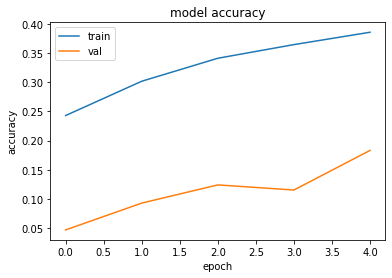

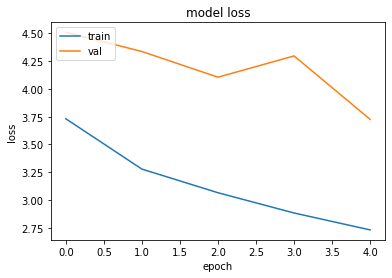

In [ ]:
plot_history(h_cnn_old_5_adam)

In [ ]:
input_im = tf.keras.Input(shape=(height, width, 3))

x = tf.keras.layers.Conv2D(32, 5, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(input_im)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(64, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(128, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.GlobalMaxPooling2D()(x)
x = tf.keras.layers.Dense(102, activation='softmax', kernel_initializer='he_uniform')(x)

cnn_old_model_6_adam = tf.keras.Model(input_im, x)

cnn_old_model_6_adam.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 200, 300, 3)]     0         
                                                                 
 conv2d_37 (Conv2D)          (None, 200, 300, 32)      2432      
                                                                 
 batch_normalization_34 (Bat  (None, 200, 300, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 100, 150, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 100, 150, 64)      18496     
                                                                 
 batch_normalization_35 (Bat  (None, 100, 150, 64)     256

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

cnn_old_model_6_adam.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics='accuracy')

h_cnn_old_6_adam = cnn_old_model_6_adam.fit(train_dataset, validation_data = val_dataset, epochs = 5)

Epoch 1/5
458/458 [==============================] - 17s 35ms/step - loss: 4.3677 - accuracy: 0.2112 - val_loss: 4.3941 - val_accuracy: 0.0990
Epoch 2/5
458/458 [==============================] - 16s 35ms/step - loss: 3.4126 - accuracy: 0.2950 - val_loss: 3.9943 - val_accuracy: 0.1346
Epoch 3/5
458/458 [==============================] - 16s 35ms/step - loss: 3.1692 - accuracy: 0.3289 - val_loss: 3.7107 - val_accuracy: 0.1679
Epoch 4/5
458/458 [==============================] - 16s 35ms/step - loss: 2.9517 - accuracy: 0.3592 - val_loss: 3.7798 - val_accuracy: 0.1893
Epoch 5/5
458/458 [==============================] - 16s 35ms/step - loss: 2.7840 - accuracy: 0.3871 - val_loss: 3.5778 - val_accuracy: 0.1997


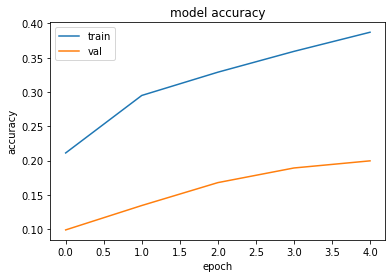

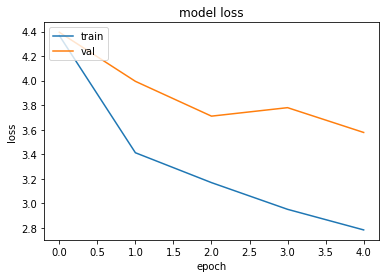

In [ ]:
plot_history(h_cnn_old_6_adam)

In [ ]:
input_im = tf.keras.Input(shape=(height, width, 3))

x = tf.keras.layers.Conv2D(32, 5, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(input_im)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(64, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(128, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.GlobalMaxPooling2D()(x)
x = tf.keras.layers.Dense(102, activation='softmax', kernel_initializer='he_uniform')(x)

cnn_old_model_7_adam = tf.keras.Model(input_im, x)

cnn_old_model_7_adam.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 200, 300, 3)]     0         
                                                                 
 conv2d_40 (Conv2D)          (None, 200, 300, 32)      2432      
                                                                 
 batch_normalization_37 (Bat  (None, 200, 300, 32)     128       
 chNormalization)                                                
                                                                 
 average_pooling2d_2 (Averag  (None, 100, 150, 32)     0         
 ePooling2D)                                                     
                                                                 
 conv2d_41 (Conv2D)          (None, 100, 150, 64)      18496     
                                                                 
 batch_normalization_38 (Bat  (None, 100, 150, 64)     256

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

cnn_old_model_7_adam.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics='accuracy')

h_cnn_old_7_adam = cnn_old_model_7_adam.fit(train_dataset, validation_data = val_dataset, epochs = 5)

Epoch 1/5
458/458 [==============================] - 17s 35ms/step - loss: 4.2053 - accuracy: 0.2045 - val_loss: 4.2664 - val_accuracy: 0.0935
Epoch 2/5
458/458 [==============================] - 16s 35ms/step - loss: 3.3911 - accuracy: 0.2921 - val_loss: 3.8720 - val_accuracy: 0.1521
Epoch 3/5
458/458 [==============================] - 16s 35ms/step - loss: 3.1298 - accuracy: 0.3301 - val_loss: 4.3708 - val_accuracy: 0.1204
Epoch 4/5
458/458 [==============================] - 16s 35ms/step - loss: 2.9145 - accuracy: 0.3669 - val_loss: 3.5331 - val_accuracy: 0.1887
Epoch 5/5
458/458 [==============================] - 16s 34ms/step - loss: 2.7286 - accuracy: 0.4023 - val_loss: 3.3317 - val_accuracy: 0.2642


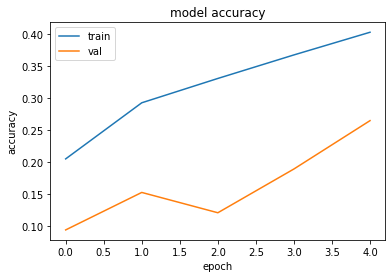

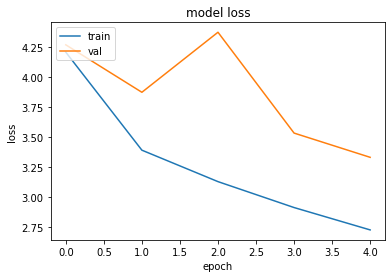

In [ ]:
plot_history(h_cnn_old_7_adam)

In [ ]:
input_im = tf.keras.Input(shape=(height, width, 3))

x = tf.keras.layers.Conv2D(32, 5, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(input_im)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, 5, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(input_im)

x = tf.keras.layers.Conv2D(64, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(64, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(x)

x = tf.keras.layers.Conv2D(128, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.GlobalMaxPooling2D()(x)
x = tf.keras.layers.Dense(102, activation='softmax', kernel_initializer='he_uniform')(x)

cnn_old_model_8_adam = tf.keras.Model(input_im, x)

cnn_old_model_8_adam.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 200, 300, 3)]     0         
                                                                 
 conv2d_44 (Conv2D)          (None, 200, 300, 32)      2432      
                                                                 
 conv2d_45 (Conv2D)          (None, 200, 300, 64)      18496     
                                                                 
 batch_normalization_41 (Bat  (None, 200, 300, 64)     256       
 chNormalization)                                                
                                                                 
 average_pooling2d_5 (Averag  (None, 100, 150, 64)     0         
 ePooling2D)                                                     
                                                                 
 conv2d_46 (Conv2D)          (None, 100, 150, 64)      369

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

cnn_old_model_8_adam.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics='accuracy')

h_cnn_old_8_adam = cnn_old_model_8_adam.fit(train_dataset, validation_data = val_dataset, epochs = 5)

Epoch 1/5
458/458 [==============================] - 33s 69ms/step - loss: 4.3720 - accuracy: 0.1874 - val_loss: 4.4746 - val_accuracy: 0.0842
Epoch 2/5
458/458 [==============================] - 32s 68ms/step - loss: 3.5152 - accuracy: 0.2739 - val_loss: 4.2943 - val_accuracy: 0.1094
Epoch 3/5
458/458 [==============================] - 32s 69ms/step - loss: 3.2500 - accuracy: 0.3119 - val_loss: 3.8805 - val_accuracy: 0.1679
Epoch 4/5
458/458 [==============================] - 32s 69ms/step - loss: 3.0725 - accuracy: 0.3341 - val_loss: 3.8811 - val_accuracy: 0.1827
Epoch 5/5
458/458 [==============================] - 32s 69ms/step - loss: 2.8994 - accuracy: 0.3669 - val_loss: 3.5320 - val_accuracy: 0.2516


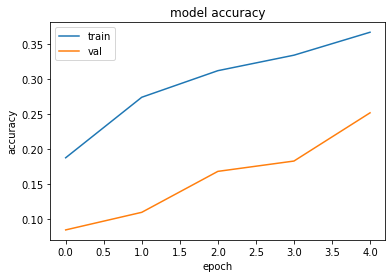

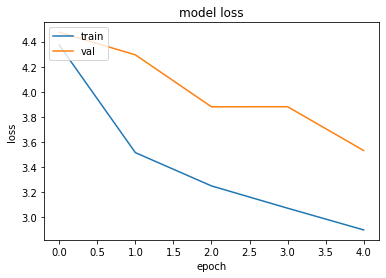

In [ ]:
plot_history(h_cnn_old_8_adam)

In [ ]:
input_im = tf.keras.Input(shape=(height, width, 3))

x = tf.keras.layers.Conv2D(32, 5, strides=1, padding='same', activation='relu', kernel_initializer='glorot_uniform')(input_im)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, 5, strides=1, padding='same', activation='relu', kernel_initializer='glorot_uniform')(input_im)

x = tf.keras.layers.Conv2D(64, 3, strides=1, padding='same', activation='relu', kernel_initializer='glorot_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(64, 3, strides=1, padding='same', activation='relu', kernel_initializer='glorot_uniform')(x)

x = tf.keras.layers.Conv2D(128, 3, strides=1, padding='same', activation='relu', kernel_initializer='glorot_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.GlobalMaxPooling2D()(x)
x = tf.keras.layers.Dense(102, activation='softmax', kernel_initializer='he_uniform')(x)

cnn_old_model_9_adam = tf.keras.Model(input_im, x)

cnn_old_model_9_adam.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 200, 300, 3)]     0         
                                                                 
 conv2d_49 (Conv2D)          (None, 200, 300, 32)      2432      
                                                                 
 conv2d_50 (Conv2D)          (None, 200, 300, 64)      18496     
                                                                 
 batch_normalization_44 (Bat  (None, 200, 300, 64)     256       
 chNormalization)                                                
                                                                 
 average_pooling2d_7 (Averag  (None, 100, 150, 64)     0         
 ePooling2D)                                                     
                                                                 
 conv2d_51 (Conv2D)          (None, 100, 150, 64)      369

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

cnn_old_model_9_adam.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics='accuracy')

h_cnn_old_9_adam = cnn_old_model_9_adam.fit(train_dataset, validation_data = val_dataset, epochs = 5)

Epoch 1/5
458/458 [==============================] - 32s 69ms/step - loss: 4.4389 - accuracy: 0.1569 - val_loss: 4.7259 - val_accuracy: 0.0301
Epoch 2/5
458/458 [==============================] - 32s 69ms/step - loss: 3.7580 - accuracy: 0.2380 - val_loss: 4.3743 - val_accuracy: 0.0799
Epoch 3/5
458/458 [==============================] - 32s 69ms/step - loss: 3.4687 - accuracy: 0.2760 - val_loss: 4.2561 - val_accuracy: 0.0957
Epoch 4/5
458/458 [==============================] - 32s 69ms/step - loss: 3.2654 - accuracy: 0.3041 - val_loss: 4.6479 - val_accuracy: 0.0782
Epoch 5/5
458/458 [==============================] - 32s 69ms/step - loss: 3.0882 - accuracy: 0.3278 - val_loss: 3.8135 - val_accuracy: 0.1712


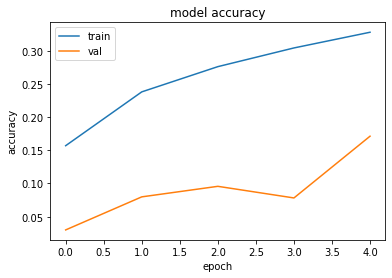

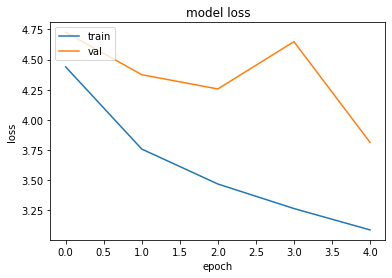

In [ ]:
plot_history(h_cnn_old_9_adam)

In [ ]:
input_im = tf.keras.Input(shape=(height, width, 3))

x = tf.keras.layers.Conv2D(32, 5, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(input_im)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(64, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(128, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(102, activation='softmax', kernel_initializer='he_uniform')(x)

cnn_old_model_10_adam = tf.keras.Model(input_im, x)

cnn_old_model_10_adam.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 200, 300, 3)]     0         
                                                                 
 conv2d_53 (Conv2D)          (None, 200, 300, 32)      2432      
                                                                 
 batch_normalization_46 (Bat  (None, 200, 300, 32)     128       
 chNormalization)                                                
                                                                 
 average_pooling2d_8 (Averag  (None, 100, 150, 32)     0         
 ePooling2D)                                                     
                                                                 
 conv2d_54 (Conv2D)          (None, 100, 150, 64)      18496     
                                                                 
 batch_normalization_47 (Bat  (None, 100, 150, 64)     256

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

cnn_old_model_10_adam.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics='accuracy')

h_cnn_old_10_adam = cnn_old_model_10_adam.fit(train_dataset, validation_data = val_dataset, epochs = 5)

Epoch 1/5
458/458 [==============================] - 32s 69ms/step - loss: 2.9476 - accuracy: 0.3514 - val_loss: 3.6399 - val_accuracy: 0.1909
Epoch 2/5
458/458 [==============================] - 32s 69ms/step - loss: 2.8421 - accuracy: 0.3725 - val_loss: 3.4874 - val_accuracy: 0.2144
Epoch 3/5
458/458 [==============================] - 32s 69ms/step - loss: 2.7268 - accuracy: 0.3911 - val_loss: 3.4446 - val_accuracy: 0.2194
Epoch 4/5
458/458 [==============================] - 32s 69ms/step - loss: 2.6074 - accuracy: 0.4122 - val_loss: 3.3322 - val_accuracy: 0.2221
Epoch 5/5
458/458 [==============================] - 32s 69ms/step - loss: 2.5139 - accuracy: 0.4229 - val_loss: 3.5073 - val_accuracy: 0.1865


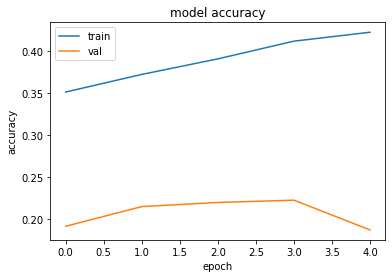

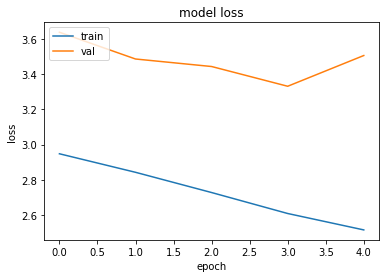

In [ ]:
plot_history(h_cnn_old_10_adam)

In [ ]:
input_im = tf.keras.Input(shape=(height, width, 3))

x = tf.keras.layers.Conv2D(32, 5, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(input_im)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(64, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(128, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(256, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(512, 3, strides=1, padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding='same')(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(102, activation='softmax', kernel_initializer='he_uniform')(x)

cnn_old_model_11_adam = tf.keras.Model(input_im, x)

cnn_old_model_11_adam.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 200, 300, 3)]     0         
                                                                 
 conv2d_56 (Conv2D)          (None, 200, 300, 32)      2432      
                                                                 
 batch_normalization_49 (Bat  (None, 200, 300, 32)     128       
 chNormalization)                                                
                                                                 
 average_pooling2d_10 (Avera  (None, 100, 150, 32)     0         
 gePooling2D)                                                    
                                                                 
 conv2d_57 (Conv2D)          (None, 100, 150, 64)      18496     
                                                                 
 batch_normalization_50 (Bat  (None, 100, 150, 64)     256

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

cnn_old_model_11_adam.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics='accuracy')

h_cnn_old_11_adam = cnn_old_model_11_adam.fit(train_dataset, validation_data = val_dataset, epochs = 5)

Epoch 1/5
458/458 [==============================] - 19s 40ms/step - loss: 14.3650 - accuracy: 0.3163 - val_loss: 16.6263 - val_accuracy: 0.2423
Epoch 2/5
458/458 [==============================] - 18s 39ms/step - loss: 4.9160 - accuracy: 0.5566 - val_loss: 3.8425 - val_accuracy: 0.4726
Epoch 3/5
458/458 [==============================] - 18s 39ms/step - loss: 1.2136 - accuracy: 0.7679 - val_loss: 1.7499 - val_accuracy: 0.7440
Epoch 4/5
458/458 [==============================] - 18s 39ms/step - loss: 0.4378 - accuracy: 0.8866 - val_loss: 2.5906 - val_accuracy: 0.6526
Epoch 5/5
458/458 [==============================] - 18s 39ms/step - loss: 0.1993 - accuracy: 0.9431 - val_loss: 4.5474 - val_accuracy: 0.4984


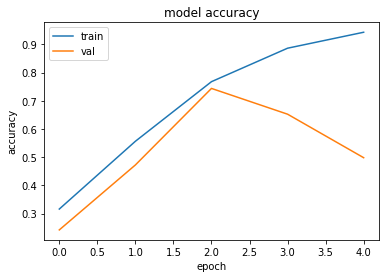

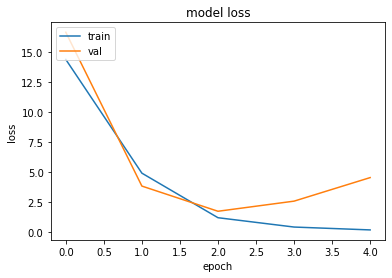

In [ ]:
plot_history(h_cnn_old_11_adam)

In [ ]:
input_im = tf.keras.Input(shape=(height, width, 3))

x = tf.keras.layers.Conv2D(32, 5, strides=2, padding='same', activation=None, kernel_initializer='he_uniform')(input_im)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(64, 3, strides=2, padding='same', activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(128, 3, strides=2, padding='same', activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(256, 3, strides=2, padding='same', activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(256, 3, strides=2, padding='same', activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(256, 3, strides=2, padding='same', activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(512, 3, strides=2, padding='same', activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(102, activation='softmax', kernel_initializer='he_uniform')(x)

cnn_2_model_adam = tf.keras.Model(input_im, x)

cnn_2_model_adam.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 200, 300, 3)]     0         
                                                                 
 conv2d_61 (Conv2D)          (None, 100, 150, 32)      2432      
                                                                 
 dropout_2 (Dropout)         (None, 100, 150, 32)      0         
                                                                 
 batch_normalization_54 (Bat  (None, 100, 150, 32)     128       
 chNormalization)                                                
                                                                 
 re_lu_9 (ReLU)              (None, 100, 150, 32)      0         
                                                                 
 conv2d_62 (Conv2D)          (None, 50, 75, 64)        18496     
                                                          

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

cnn_2_model_adam.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics='accuracy')

h_cnn_2_old_adam = cnn_2_model_adam.fit(train_dataset, validation_data = val_dataset, epochs = 5)

Epoch 1/5
458/458 [==============================] - 16s 33ms/step - loss: 3.4463 - accuracy: 0.3311 - val_loss: 3.8996 - val_accuracy: 0.2347
Epoch 2/5
458/458 [==============================] - 15s 33ms/step - loss: 2.1259 - accuracy: 0.5003 - val_loss: 2.8576 - val_accuracy: 0.3764
Epoch 3/5
458/458 [==============================] - 15s 33ms/step - loss: 1.4269 - accuracy: 0.6387 - val_loss: 1.9611 - val_accuracy: 0.5481
Epoch 4/5
458/458 [==============================] - 15s 33ms/step - loss: 0.8195 - accuracy: 0.7795 - val_loss: 1.3857 - val_accuracy: 0.6570
Epoch 5/5
458/458 [==============================] - 15s 33ms/step - loss: 0.4007 - accuracy: 0.8930 - val_loss: 0.9361 - val_accuracy: 0.7735


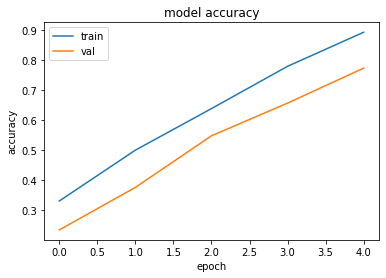

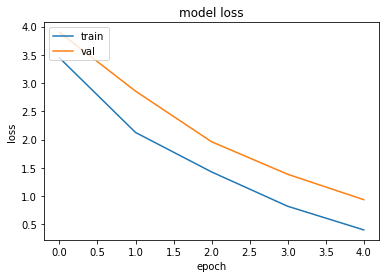

In [ ]:
plot_history(h_cnn_2_old_adam)

In [ ]:
input_im = tf.keras.Input(shape=(height, width, 3))

x = tf.keras.layers.Conv2D(32, 5, strides=2, padding='same', activation=None, kernel_initializer='he_uniform')(input_im)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(64, 3, strides=2, padding='same', activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(128, 3, strides=2, padding='same', activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(256, 3, strides=2, padding='same', activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(256, 3, strides=2, padding='same', activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(256, 3, strides=2, padding='same', activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Conv2D(512, 3, strides=2, padding='same', activation=None, kernel_initializer='he_uniform')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.ReLU()(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(102, activation='softmax', kernel_initializer='he_uniform')(x)

cnn_3_model_adam = tf.keras.Model(input_im, x)

cnn_3_model_adam.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 200, 300, 3)]     0         
                                                                 
 conv2d_75 (Conv2D)          (None, 100, 150, 32)      2432      
                                                                 
 dropout_6 (Dropout)         (None, 100, 150, 32)      0         
                                                                 
 batch_normalization_68 (Bat  (None, 100, 150, 32)     128       
 chNormalization)                                                
                                                                 
 re_lu_23 (ReLU)             (None, 100, 150, 32)      0         
                                                                 
 conv2d_76 (Conv2D)          (None, 50, 75, 64)        18496     
                                                          

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=1e-6,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

cnn_3_model_adam.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics='accuracy')

h_cnn_3_old_adam = cnn_3_model_adam.fit(train_dataset, validation_data = val_dataset, epochs = 50)

Epoch 1/50
458/458 [==============================] - 16s 33ms/step - loss: 4.9646 - accuracy: 0.0159 - val_loss: 4.7549 - val_accuracy: 0.0170
Epoch 2/50
458/458 [==============================] - 15s 33ms/step - loss: 4.7242 - accuracy: 0.0336 - val_loss: 4.7584 - val_accuracy: 0.0098
Epoch 3/50
458/458 [==============================] - 15s 33ms/step - loss: 4.5614 - accuracy: 0.0701 - val_loss: 4.7630 - val_accuracy: 0.0055
Epoch 4/50
458/458 [==============================] - 15s 33ms/step - loss: 4.4539 - accuracy: 0.0979 - val_loss: 4.7818 - val_accuracy: 0.0033
Epoch 5/50
458/458 [==============================] - 15s 33ms/step - loss: 4.3914 - accuracy: 0.1113 - val_loss: 4.8015 - val_accuracy: 0.0011
Epoch 6/50
458/458 [==============================] - 15s 33ms/step - loss: 4.3386 - accuracy: 0.1217 - val_loss: 4.8195 - val_accuracy: 0.0016
Epoch 7/50
458/458 [==============================] - 15s 33ms/step - loss: 4.2941 - accuracy: 0.1323 - val_loss: 4.8382 - val_accuracy:

KeyboardInterrupt: ignored